In [1]:
%cd ../src

/ws/src


In [2]:
import rclpy

In [3]:
rclpy.init()

In [4]:
dir(rclpy)

['Context',
 'Future',
 'List',
 'Optional',
 'Parameter',
 'SignalHandlerOptions',
 'TYPE_CHECKING',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__executor',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_rclpy_pybind11',
 '_shutdown',
 'constants',
 'context',
 'create_node',
 'exceptions',
 'get_default_context',
 'get_global_executor',
 'get_rmw_implementation_identifier',
 'guard_condition',
 'impl',
 'init',
 'install_signal_handlers',
 'ok',
 'parameter',
 'shutdown',
 'signals',
 'spin',
 'spin_once',
 'spin_until_future_complete',
 'task',
 'try_shutdown',
 'uninstall_signal_handlers',
 'utilities']

In [5]:
from std_msgs.msg import String
from sensor_msgs.msg  import LaserScan

In [6]:
from functools import partial
import itertools

In [7]:
def scans():
    node = rclpy.create_node('minimal_subscriber')
    scans = []

    def process_one(msg):
        node.get_logger().info('I heard: "%s"' % repr(msg))
        scans.append(msg)

    subscription = node.create_subscription(
        LaserScan, 'scan', process_one, 10)

    while True:
        rclpy.spin_once(node)
        yield from scans

In [8]:
print(next(scans()))

sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=8, nanosec=307000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 

[INFO] [1715956386.167265825] [minimal_subscriber]: I heard: "sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=8, nanosec=307000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf

In [9]:
import numpy as np
import math

In [10]:
from lidarocclusion.masks import BoolLidarMask, ProbLidarMask
from lidarocclusion.sliding_lidar_masks import sliding_prob_lidar_mask, sliding_lidar_mask

In [11]:
from fractions import Fraction

In [12]:
def lidar_scan_to_mask(l: LaserScan):
    xs = np.array(l.ranges)
    return BoolLidarMask(
        (xs != math.inf) & (xs != -math.inf),
        Fraction(l.angle_increment/math.pi).limit_denominator(400)
    )

In [13]:
s = scans()

In [14]:
lidar_scan_to_mask(next(s))

[WARN] [1715956386.531441460] [rcl.logging_rosout]: Publisher already registered for provided node name. If this is due to multiple nodes with the same name then all logs for that logger name will go out over the existing publisher. As soon as any node with that name is destructed it will unregister the publisher, preventing any further logs for that name from being published on the rosout topic.
[INFO] [1715956386.834706064] [minimal_subscriber]: I heard: "sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=8, nanosec=370000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 

BoolLidarMask([[Fraction(0, 1),Fraction(7, 10)), [Fraction(13, 16),Fraction(267, 320)), [Fraction(199, 160),Fraction(399, 320)), [Fraction(423, 320),Fraction(2, 1))], 1/320)

[INFO] [1715956387.188240464] [minimal_subscriber]: I heard: "sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=8, nanosec=385000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf

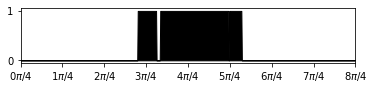

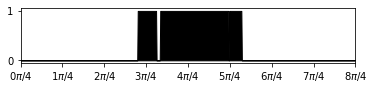

In [15]:
mask = lidar_scan_to_mask(next(s))
mask.plot()

In [16]:
sliding_prob_masks = sliding_prob_lidar_mask(map(lidar_scan_to_mask, s), window_size=3)
sliding_masks = sliding_lidar_mask(map(lidar_scan_to_mask, s), window_size=3, cutoff=0.9)

In [265]:
next(s)

[INFO] [1715957523.872119594] [minimal_subscriber]: I heard: "sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=303, nanosec=186000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -i

sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=303, nanosec=186000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf

49797058105, 1.3477814197540283, 1.353458046913147, 1.362061619758606, 1.367844581604004, 1.3768906593322754, 1.38322114944458, 1.3931952714920044, 1.4001809358596802, 1.4074509143829346, 1.4189188480377197, 1.4269611835479736, 1.435339093208313, 1.444069743156433, 1.4531699419021606, 1.4626593589782715, 1.472557544708252, 2.71805739402771, 2.7378172874450684, 2.758450984954834, 2.780003547668457, 2.802525281906128, 2.826068878173828, 2.8506908416748047, -inf, -inf, -inf, -inf, -inf, -inf, -inf, 5.547157287597656, 5.479957580566406, 5.446929454803467, 5.3820085525512695, 5.350113391876221, 5.287448883056641, 5.226278781890869, 5.1962504386901855, 5.137304306030273, 5.1083831787109375, 5.051641464233398, 5.0238189697265625, 4.96926212310791, 4.942527770996094, 4.890139102935791, 4.86448335647583, 4.839184761047363, 4.789657115936279, 4.765425682067871, 4.718021869659424, 4.694847583770752, 4.6495490074157715, 4.627422332763672, 4.6056437492370605, 4.563121318817139, 4.54237699508667, 4.

In [266]:
Out[265].angle_increment

0.009832840412855148

In [267]:
len(Out[265].ranges)

640

[INFO] [1715957358.042843532] [minimal_subscriber]: I heard: "sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=244, nanosec=929000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -i

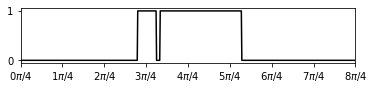

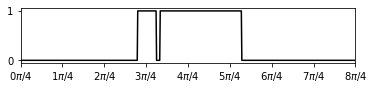

In [264]:
prob_mask = next(sliding_prob_masks)
prob_mask.plot()

[INFO] [1715956657.363532737] [minimal_subscriber]: I heard: "sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=34, nanosec=290000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -in

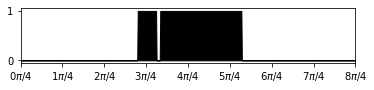

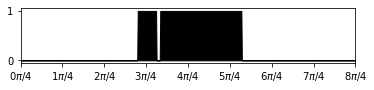

In [188]:
mask = next(sliding_masks)
mask.plot()

In [12]:
scans[0]

sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=242, nanosec=433000000), frame_id='turtlebot4/rplidar_link/rplidar'), angle_min=-3.1415927410125732, angle_max=3.1415927410125732, angle_increment=0.009832840412855148, time_increment=0.0, scan_time=0.0, range_min=0.164000004529953, range_max=12.0, ranges=[1.6406224966049194, 1.627848505973816, 1.6216846704483032, 1.6156673431396484, 1.6040656566619873, 1.5984774827957153, 1.5930287837982178, 1.587717890739441, 1.5775028467178345, 1.5725950002670288, 1.6011433601379395, 1.6337207555770874, 1.703155279159546, 1.740190029144287, 1.7788972854614258, 1.8617812395095825, 1.9062044620513916, 1.9527994394302368, 2.0017197132110596, 2.107229232788086, 2.1642091274261475, 2.2243006229400635, 2.354846477508545, 2.425889730453491, 2.501228094100952, 2.521787405014038, 2.517747640609741, 2.5138704776763916, 2.5065925121307373, 2.5031869411468506, 2.499933958053589, 2.4938759803771973, 2.4910659790039062, 2.4

In [ ]:
import lidar